In [1]:
# SETTINGS

number_topics = 15

# Filter

Here we assume that the source file already contains the text, as it's a subcorpus.

In [2]:
# Filter the input file
import pandas as pd

df = pd.read_csv('00 source data (urls).csv')
df.fillna('', inplace=True)

# /!\ FILTERING
df = df[df['language'] == 'Danish']

df.to_csv("01 data filtered.csv", index = False, encoding='utf-8')

df

,result #,search engine,query,discourse,language,domain,Manual actor name,article title,article url,article description,...,canonical_url,title,description,raw_content,comments,author,categories,tags,date,sitename
0,33.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,norskov,,Miljø,https://www.norskov.dk/miljo,Nørskov miljø er rigtig gode til at lave en si...,...,,Miljø,Nørskov Miljø hjælper virksomheder med alle ty...,De fleste virksomheder vil gerne have styr på ...,,Pelle P,,MiljøcertificeringMiljøforholdMiljøkortlægning...,,
1,4.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,mfvm,,"Ministeriet for Fødevarer, Landbrug og Fiskeri...",https://mfvm.dk/,"Den 19. november 2020 er det besluttet, at Mil...",...,https://mfvm.dk/index.php?id=15654,Fødevareministeriet og Miljøministeriet,"Den 19. november 2020 er det besluttet, at Mil...","Den 19. november 2020 er det besluttet, at Mil...",,,,,,"Ministeriet for Fødevarer, Landbrug og Fiskeri"
2,0.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,wikipedia,,"Miljø - Wikipedia, den frie encyklopædi",https://da.wikipedia.org/wiki/Milj%C3%B8,,...,https://da.wikipedia.org/wiki/Milj%C3%B8,"Miljø - Wikipedia, den frie encyklopædi",,"Miljø\nMiljø betyder ""omgivelser"" og dækker og...",,Bidragsydere til Wikimedia-projekter,,,2003-01-03,"Wikipedia, den frie encyklopædi"
3,9.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,miljoeportal,,Danmarks Miljøportal Miljoeportalen.dk,https://miljoeportal.dk/,Danmarks Miljøportal satser i vores strategi p...,...,https://miljoeportal.dk/,Danmarks Miljøportal,Danmarks Miljøportal,Seneste nyheder\nInvitation til webinar om Van...,,,,miljøportal|miljøvenlig|Danmarks Miljø|data om...,,Danmarks Miljøportal
4,41.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,avl,,Miljø - Aage Vestergaard Larsen A/S - AVL,https://avl.dk/miljo,"Miljø. Miljøet spares gennemsnitlig for 2,4 ki...",...,https://avl.dk/miljo,Miljø - Aage Vestergaard Larsen A/S,"Miljøet spares for 2,4 kilo CO2 udslip for hve...","Miljø\nMiljøet spares gennemsnitlig for 2,4 ki...",,,,,2019-08-30,AVL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,82.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,fmk,,Miljø og Byg - Faaborg-Midtfyn Municipality,https://www.fmk.dk/borger/miljoe-energi-og-aff...,Afdelingen Miljø og Byg i Faaborg-Midtfyn Komm...,...,,CLEAN Grøn Erhvervsvækst,Faaborg-Midtfyn Kommune er partner i det offen...,Faaborg-Midtfyn Kommune er partner i det offen...,,,,CLEAN Grøn Erhvervsvækst|CLEAN|Grøn Erhvervsvæ...,,
528,,,,,Danish,klimatilpasning,,tilføjet fra holstebro.dk,https://www.klimatilpasning.dk/viden-om/fremti...,,...,,Havniveau og klimaforandringer,,Havniveau og klimaforandringer\nOpvarmningen a...,,,,andet|Her markerer man hvis ingen andre emneor...,,
529,51.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,regionh,,Miljø - Region H,https://www.regionh.dk/til-fagfolk/miljoe/en-g...,"Miljø Med FN""s verdensmål som pejlemærke arbej...",...,https://www.regionh.dk/til-fagfolk/miljoe/en-g...,Sådan arbejder vi med cirkulær økonomi,I Region Hovedstaden arbejder vi for en grøn o...,Afsæt i dialog med interessenter\nOmstillingen...,,,,Cirkulær økonomi|Regional udvikling Ressourcee...,2021-04-27,regionh.dk
530,88.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,esbjerg,,Plan & Miljø - Esbjerg,https://www.esbjerg.dk/planer-projekter-og-tra...,Esbjerg Kommunes Plan &amp; Miljøudvalg,...,https://www.esbjerg.dk/planer-projekter-og-tra...,Grøn omstilling af energiforsyningen,Grøn omstilling af energiforsyningen,Grøn omstilling af energiforsyningen\nHer er v...,,,,Grøn omstilling af energiforsyningen|Grøn omst...,2021-03-16,esbjerg.dk


# Group content by actor

In [3]:
actor_dict = {}
for index, row in df.iterrows():
    if row['Manual actor name']:
        actor_id = row['Manual actor name']
    else:
        actor_id = row['domain']
    if actor_id in actor_dict:
        actor_obj = actor_dict[actor_id]
    else:
        actor_obj = {}
        actor_obj['Id'] = actor_id
        actor_obj['urls'] = ''
        actor_obj['text'] = ''
        actor_obj['language'] = row['language']
    
    actor_obj['urls'] = actor_obj['urls'] + str(row['article url']) + ' '
    actor_obj['text'] = actor_obj['text'] + str(row['raw_content']) + ' . '
    
    actor_dict[actor_id] = actor_obj
print("Actor index built.")

Actor index built.


In [4]:
# DOWNLOAD ACTORS
actors_df = pd.DataFrame.from_dict(actor_dict, orient='index')
actors_df.to_csv("02 Actors with text.csv", index = False, encoding='utf-8')
actors_df

,Id,urls,text,language
norskov,norskov,https://www.norskov.dk/miljo https://www.norsk...,De fleste virksomheder vil gerne have styr på ...,Danish
mfvm,mfvm,https://mfvm.dk/ https://mfvm.dk/fileadmin/use...,"Den 19. november 2020 er det besluttet, at Mil...",Danish
wikipedia,wikipedia,https://da.wikipedia.org/wiki/Milj%C3%B8 https...,"Miljø\nMiljø betyder ""omgivelser"" og dækker og...",Danish
miljoeportal,miljoeportal,https://miljoeportal.dk/ https://miljoeportal....,Seneste nyheder\nInvitation til webinar om Van...,Danish
avl,avl,https://avl.dk/miljo https://avl.dk/miljo,"Miljø\nMiljøet spares gennemsnitlig for 2,4 ki...",Danish
...,...,...,...,...
Desmi,Desmi,https://www.desmi.com/about-desmi/,DESMI is a global company\nFounded in 1834 and...,Danish
Niras,Niras,https://www.niras.com/sustainability/,Realising your sustainable potential\nWe make ...,Danish
Grønlands Rejsebureau,Grønlands Rejsebureau,https://www.greenland-travel.dk/om-os/csr/,For den bedste oplevelse anbefaler vi at du br...,Danish
MOE A/S,MOE A/S,https://www.moe.global/services/sustainability/,Skip to content .,Danish


# LDA: extract topics

In [5]:
import pandas as pd
# This is for text mining
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# Source file (CSV)
source_file = "02 Actors with text.csv"
text_col_name = "text"

# More features is more dimensions for each document. You should probably keep it at 1000.
no_features = 1000

In [7]:
# LOAD DATA
documents_dictionary = {}
df = pd.read_csv(source_file)

for index, row in df.iterrows():
    key = row['Id']
    text = str(row[text_col_name])
    if len(text)>10:
        documents_dictionary[key] = text

In [8]:
# LOAD STOP WORDS
import csv
stopwords = []
with open('stopwords-en-dk-is.txt', 'r') as fd:
    reader = csv.reader(fd)
    for row in reader:
        word = row[0]
        stopwords.append(word)
print("Stop words loaded. Ex:", stopwords[0], stopwords[1], stopwords[2],"...")

Stop words loaded. Ex: i me my ...


In [9]:
# COMPUTE LDA TOPICS
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=stopwords)
tf = tf_vectorizer.fit_transform(documents_dictionary.values())
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=number_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print("LDA topics computed.")

LDA topics computed.


In [10]:
# DISPLAY RESULTS (for monitoring)
no_top_words = 25 # How many words to keep for each topic (there may be many)

# Create a data frame for convenience (for download, actually)
topics_df = pd.DataFrame(columns=['topic','word','weight'])

# Display topics to check it works. For each topic, we only display the top words.
i = 0
for topic_idx, topic in enumerate(lda.components_):
    print("# TOPIC_%d:" % (topic_idx))
    for j in topic.argsort()[:-no_top_words - 1:-1]:
        print(str(topic[j]) + "   " + tf_feature_names[j])
        topics_df.loc[i] = ["TOPIC_"+str(topic_idx), tf_feature_names[j], topic[j]]
        i = i+1
    print(" ")

topics_df

# TOPIC_0:
6.21805808228458   dæk
4.353623306177097   co2
4.044251771348568   000
3.349495803394441   find
2.456312680914936   håndtering
2.415479029533905   lokale
1.8984694494797292   hjemmeside
1.8650666039897927   fjernvarme
1.8634586463250558   miljøet
1.853804963602894   60
1.7770819587108821   brugt
1.7396353511398899   neutral
1.7307728138821712   olie
1.7279521177253874   genbrug
1.7204499959235202   råvarer
1.6509363801742576   50
1.630183570303449   genanvendelse
1.599679785701213   affald
1.4166405548864798   løbende
1.3801165199184182   nye
1.3721550016459156   hvert
1.3642128774133575   30
1.3402714874695076   15
1.2273305438889797   produkter
1.2220463145561895   sidste
 
# TOPIC_1:
23.243846403190414   eps
6.868532020784685   produkter
6.104489655289217   anvendes
5.745476755786158   materialer
4.955266673957712   olie
4.913872345985254   produktion
4.8983878712023365   træ
4.721857193884863   byggeri
4.7193940851715395   kolding
4.32796932889235   ressourcer
4.20366577

1.7100824647264956   innovative
1.6767388036210844   innovation
1.6190187692645726   green
1.6094832105949313   100
1.5672691792078737   people
1.4862689360190156   20
1.3747206074931455   danmark
 
# TOPIC_12:
109.83044657277526   cradle
29.83195277278686   pureprint
25.594416727714663   kls
18.285497829447394   produkter
15.688372987506153   fsc
13.022674512287136   certificeret
12.735033350449639   certified
11.84005181612709   co2
9.797622238496691   bæredygtighed
9.367245971773787   emballage
8.936675546649269   produkt
8.686961039827455   miljø
8.413798969957627   produceret
8.344827782321902   bæredygtige
8.124117425781904   mennesker
7.988265669310043   år
7.785064263131662   hele
7.416926209781566   natur
7.025688060863994   materialer
6.998854310401384   danmark
6.945076929016991   products
6.93639414266041   svanemærket
6.804588084680114   betyder
6.447191116049172   muligt
6.417495083579111   nye
 
# TOPIC_13:
2.706717395012723   aalborg
1.9741467280650977   bæredygtig
1.49

,topic,word,weight
0,TOPIC_0,dæk,6.218058
1,TOPIC_0,co2,4.353623
2,TOPIC_0,000,4.044252
3,TOPIC_0,find,3.349496
4,TOPIC_0,håndtering,2.456313
...,...,...,...
370,TOPIC_14,danske,2.050359
371,TOPIC_14,sociale,2.049433
372,TOPIC_14,mennesker,1.990567
373,TOPIC_14,herunder,1.946054


In [11]:
# COMPUTE DOC x TOPIC RELATIONS (network)
# We create a data frame to store the content. It looks like a matrix.
df_matrix_style = pd.DataFrame(columns=['doc']+[("TOPIC_"+str(i)) for i in range(0,number_topics)])

# We create a second data frame with the same data. It looks like a list.
# Depending on what you want to do, one or the other are most convenient.
df_list_style = pd.DataFrame(columns=['doc', 'topic', 'weight'])

doc_topic = lda.transform(tf)
docs = list(documents_dictionary.keys())
topic_index = {}
i1 = 0
i2 = 0
for j in range(len(docs)):
    key = docs[j]
    topic_weights = list(doc_topic[j])
    
    # Index
    topic_index[key] = topic_weights
    
    # Matrix style
    df_matrix_style.loc[i1] = [key]+topic_weights
    i1 = i1+1
    
    # List style
    for k, w in enumerate(topic_weights):
        df_list_style.loc[i2] = [key, "TOPIC_"+str(k), w]
        i2 = i2+1

print("Done.")

Done.


In [12]:
# Output articles & topics, matrix style, to check that it works:
df_matrix_style

,doc,TOPIC_0,TOPIC_1,TOPIC_2,TOPIC_3,TOPIC_4,TOPIC_5,TOPIC_6,TOPIC_7,TOPIC_8,TOPIC_9,TOPIC_10,TOPIC_11,TOPIC_12,TOPIC_13,TOPIC_14
0,norskov,0.000480,0.000480,0.000480,0.000480,0.000480,0.993285,0.000480,0.000480,0.000480,0.000480,0.000480,0.000480,0.000480,0.000480,0.000480
1,mfvm,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.906666,0.006667,0.006667,0.006667,0.006667,0.006667
2,wikipedia,0.000074,0.000074,0.961641,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.037399,0.000074,0.000074,0.000074,0.000074,0.000074
3,miljoeportal,0.002899,0.002899,0.002899,0.002899,0.002899,0.002899,0.002899,0.002899,0.002899,0.959420,0.002899,0.002899,0.002899,0.002899,0.002899
4,avl,0.000294,0.000294,0.704545,0.000294,0.000294,0.291637,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Desmi,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.950877,0.003509,0.003509,0.003509
216,Niras,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.961111,0.002778,0.002778,0.002778
217,Grønlands Rejsebureau,0.000251,0.000251,0.534981,0.000251,0.000251,0.461760,0.000251,0.000251,0.000251,0.000251,0.000251,0.000251,0.000251,0.000251,0.000251
218,MOE A/S,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667


In [13]:
# Output articles & topics, list style, to check that it works:
df_list_style

,doc,topic,weight
0,norskov,TOPIC_0,0.000480
1,norskov,TOPIC_1,0.000480
2,norskov,TOPIC_2,0.000480
3,norskov,TOPIC_3,0.000480
4,norskov,TOPIC_4,0.000480
...,...,...,...
3295,csrkompasset,TOPIC_10,0.000107
3296,csrkompasset,TOPIC_11,0.000107
3297,csrkompasset,TOPIC_12,0.000107
3298,csrkompasset,TOPIC_13,0.000107


In [14]:
# DOWNLOAD LDA results
# Note: these files can be used in Tableau or Table2Net to build various visualizations.

topics_df.to_csv("03-a LDA topics and their words.csv", index = False, encoding='utf-8')
# df_matrix_style.to_csv("03-? LDA actors and topics matrix.csv", index = False, encoding='utf-8')
df_list_style.to_csv("03-b LDA actors and topics list style.csv", index = False, encoding='utf-8')

In [15]:
# ENRICH FILE (and monitor new version)
for topic_id, topic in enumerate(lda.components_):
    colname = "topic_"+str(topic_id)
    values = []
    for index, row in df.iterrows():
        key = row['Id']
        if key in topic_index:
            val = topic_index[key][topic_id]
        else:
            val = 0
        values.append(val)
    df.insert(len(df.columns), colname, values)
df

,Id,urls,text,language,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,norskov,https://www.norskov.dk/miljo https://www.norsk...,De fleste virksomheder vil gerne have styr på ...,Danish,0.000480,0.000480,0.000480,0.000480,0.000480,0.993285,0.000480,0.000480,0.000480,0.000480,0.000480,0.000480,0.000480,0.000480,0.000480
1,mfvm,https://mfvm.dk/ https://mfvm.dk/fileadmin/use...,"Den 19. november 2020 er det besluttet, at Mil...",Danish,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.906666,0.006667,0.006667,0.006667,0.006667,0.006667
2,wikipedia,https://da.wikipedia.org/wiki/Milj%C3%B8 https...,"Miljø\nMiljø betyder ""omgivelser"" og dækker og...",Danish,0.000074,0.000074,0.961641,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.037399,0.000074,0.000074,0.000074,0.000074,0.000074
3,miljoeportal,https://miljoeportal.dk/ https://miljoeportal....,Seneste nyheder\nInvitation til webinar om Van...,Danish,0.002899,0.002899,0.002899,0.002899,0.002899,0.002899,0.002899,0.002899,0.002899,0.959420,0.002899,0.002899,0.002899,0.002899,0.002899
4,avl,https://avl.dk/miljo https://avl.dk/miljo,"Miljø\nMiljøet spares gennemsnitlig for 2,4 ki...",Danish,0.000294,0.000294,0.704545,0.000294,0.000294,0.291637,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Desmi,https://www.desmi.com/about-desmi/,DESMI is a global company\nFounded in 1834 and...,Danish,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.950877,0.003509,0.003509,0.003509
226,Niras,https://www.niras.com/sustainability/,Realising your sustainable potential\nWe make ...,Danish,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.961111,0.002778,0.002778,0.002778
227,Grønlands Rejsebureau,https://www.greenland-travel.dk/om-os/csr/,For den bedste oplevelse anbefaler vi at du br...,Danish,0.000251,0.000251,0.534981,0.000251,0.000251,0.461760,0.000251,0.000251,0.000251,0.000251,0.000251,0.000251,0.000251,0.000251,0.000251
228,MOE A/S,https://www.moe.global/services/sustainability/,Skip to content .,Danish,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667


In [16]:
# DOWNLOAD ENRICHED FILE
df.drop(columns=[text_col_name]).to_csv("04 Actors and their topics.csv", index=False)

# Export LDA networks

In [17]:
# Export network of words and topics
import networkx as nx
G = nx.Graph()
for index, row in topics_df.iterrows():
    topic = 'T_'+str(row['topic'])
    word = 'W_'+str(row['word'])
    w = row['weight']
    
    G.add_edge(topic, word)
    G[topic][word]['weight'] = w
    
    G.nodes[topic]['label'] = str(row['topic'])
    G.nodes[topic]['type'] = 'topic'
    G.nodes[word]['label'] = str(row['word'])
    G.nodes[word]['type'] = 'word'
    
nx.write_gexf(G, "05 Words and topics.gexf")

In [18]:
# Export network of actors and topics
import networkx as nx
threshold = 0.001
G = nx.Graph()
for index, row in df_list_style.iterrows():
    topic = 'T_'+str(row['topic'])
    actor = 'A_'+str(row['doc'])
    w = row['weight']
    
    if w > threshold:
        G.add_edge(topic, actor)
        G[topic][actor]['weight'] = w

        G.nodes[topic]['label'] = str(row['topic'])
        G.nodes[topic]['type'] = 'topic'
        G.nodes[actor]['label'] = str(row['doc'])
        G.nodes[actor]['type'] = 'actor'
    
nx.write_gexf(G, "06 Actors and topics.gexf")

# UMAP after the topics

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import umap

In [20]:
# Load data
df = pd.read_csv("04 Actors and their topics.csv")
df = df.dropna()

In [21]:
# Prepare data
reducer = umap.UMAP()
umap_data = df[
    [
        "topic_0",
        "topic_1",
        "topic_2",
        "topic_3",
        "topic_4",
        "topic_5",
        "topic_6",
        "topic_7",
        "topic_8",
        "topic_9",
        "topic_10",
        "topic_11",
        "topic_12",
        "topic_13",
        "topic_14"
    ]
].values
scaled_umap_data = StandardScaler().fit_transform(umap_data)

In [22]:
# Compute embedding
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(230, 2)

Text(0.5, 1.0, 'UMAP projection of the dataset')

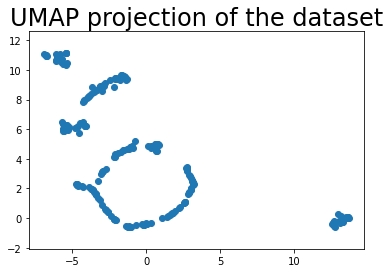

In [23]:
# Monitor embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [24]:
# Enrich source and download
xvalues = []
yvalues = []
for index, row in df.iterrows():
    coord = embedding[index]
    xvalues.append(coord[0])
    yvalues.append(coord[1])
df.insert(len(df.columns), 'X-UMAP', xvalues)
df.insert(len(df.columns), 'Y-UMAP', yvalues)

df.to_csv("07 Actors with topics + UMAP layout.csv", index = False, encoding='utf-8')